In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import copy

from shapely import Point
from shapely import affinity, set_precision
from shapely.plotting import plot_points

#sys.path.insert(1, '/Users/neoh/Documents/git/eeroqlab/')
sys.path.insert(1, '/Users/helium/Documents/git/eeroqlab/')

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
from zeroheliumkit.dev.core import GeometryCollection
from zeroheliumkit.dev.anchors import *
from zeroheliumkit.dev.geometries import *

from zeroheliumkit.settings import *
from zeroheliumkit.helpers.plotting import *

colorlist = [BLUE, YELLOW2, RED, GREEN, GRAY]

0.0


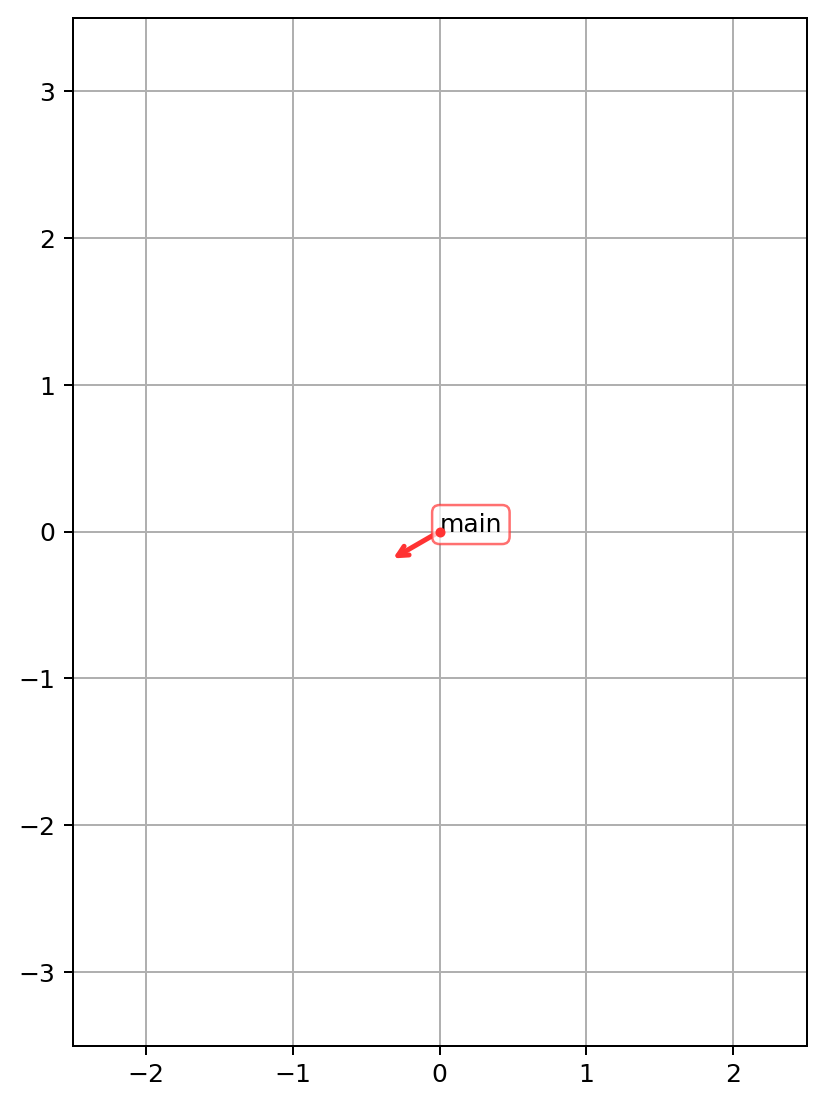

In [3]:
p = Anchor((0,0), 10, "main")
p.rotate(920)
print(p.x)

fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=(0,0), dxdy=[5, 7])

p.plot(ax=ax, color=RED)

plt.grid()
plt.gca().set_aspect('equal')
plt.show()

In [4]:
config = {"top": True,
          "gnd": True}

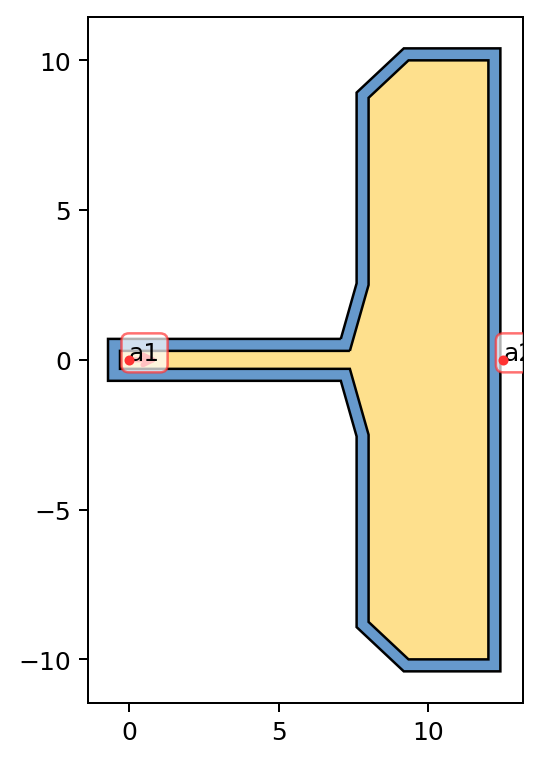

In [5]:
pg = PinchGate(arm_w = 0.6, 
               arm_l = 8, 
               length = 20, 
               width = 4)
pgate_base = GeometryCollection(layers={"top": pg,
                                        "gnd": pg.buffer(0.4, join_style="mitre"),
                                        "anchorsmod": MultiAnchor([Anchor((0,0), 0, "a1"), Anchor((8 + 4 + 0.5, 0), 0, "a2")])})



#pgate = Structure(config)
#pgate.append(pgate_base)
"""
tp = Taper(length = 1,
           width1 = d["w1"],
           width2 = pinch["arm_w"],
           input_length = 2,
           output_length = 1,
           anchors = "flat",
           layers = {"top": None,
                     "gnd": (d["g1"], pinch["arm_g"])})
pgate.append(tp, anchoring=[0, 1], connection_type=conn)
pgate.move(origin_anchor=0)
pgate.delete_anchors([1])
"""
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

In [6]:
pgate_base.add_anchor([Anchor((5,5), 56, "b1"), Anchor((5,-5), -56, "b2")])

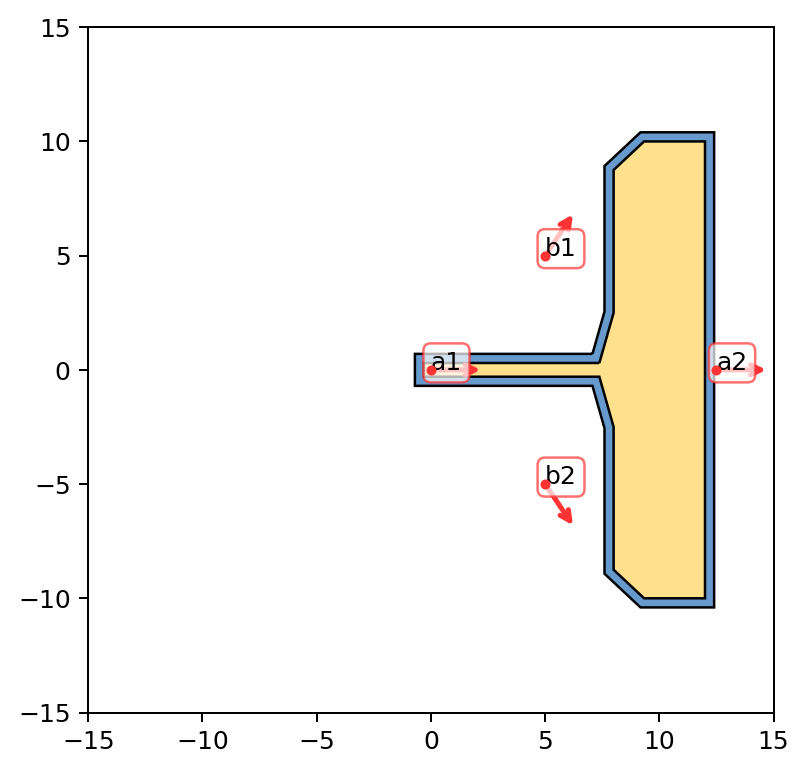

In [7]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [8]:
pgate_base.get_anchor("a1").properties

-----  ----------  ---------
label  coords      direction
a1     (0.0, 0.0)  0
-----  ----------  ---------


In [9]:
pgate = Structure()
pgate.append(pgate_base)

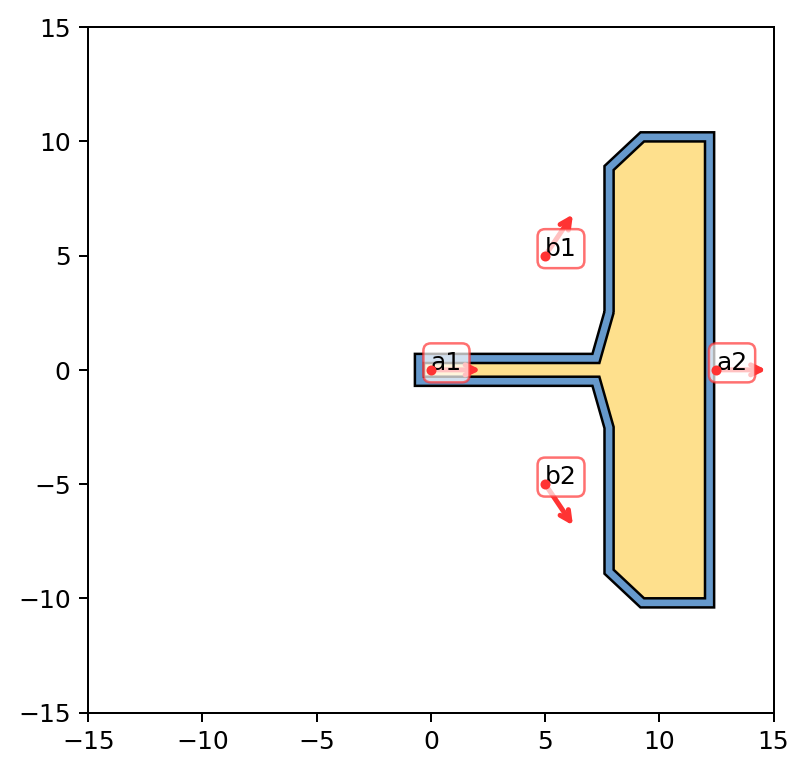

In [10]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [15]:
pts = [(0,0), (5,1), (7,6), (10,6), (13,10)]
w1 = np.asarray([0.5, 0.6, 0.7, 0.8, 0.9])
g1 = np.asarray([0.1, 1.2, 0.3, 0.4, 0.5]) * 2
ll = {"l1": w1, "l2": w1 + g1}

EL = ExtrudedLine(pts, ll, ("m1", "m2"))

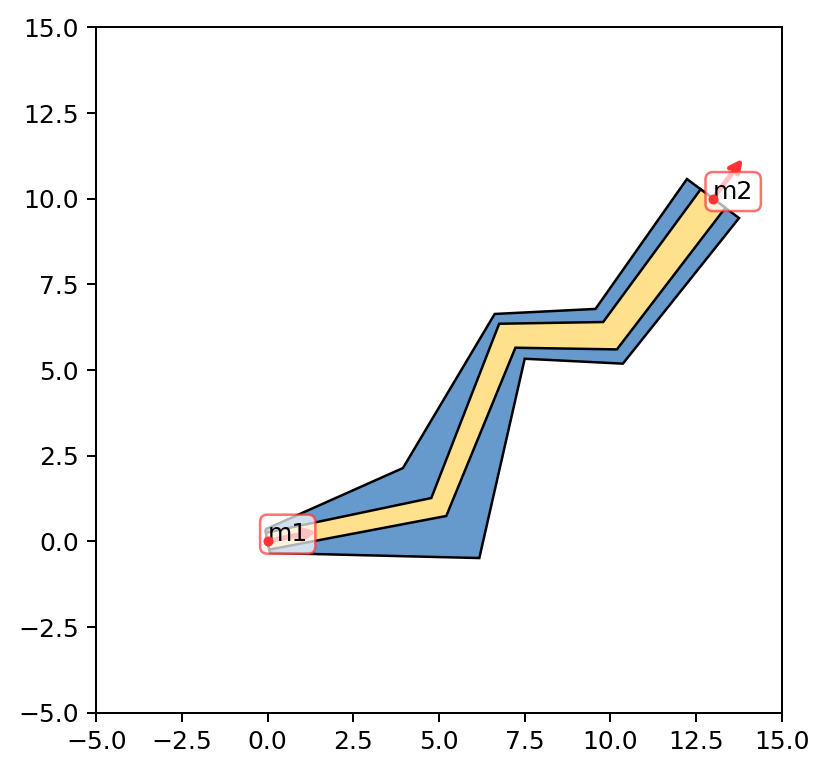

In [16]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[5,5], dxdy=[20,20])
EL.plot(ax=ax, layer=["l2", "l1", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()